# **SHAP 실습 및 결과 해석**

아래 과정에 따라 예측 모델링을 수행하고 건설된 예측 모델을 SHAP 방법론을 이용해 해석해 봅시다.

### **1. 데이터 불러오기 (자전거, 자궁암)**
### **2. 독립변수, 종속변수 설정**
### **3. Train/Test로 나누기**
### **4. 예측 모델링**
### **5. SHAP 기반 예측 모델 해석**

## **1. 데이터 불러오기 (자전거, 자궁암)**

In [1]:
# 구글 드라이브에 실습 파일을 넣고 불러오기
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# 자전거, 자궁암 대여 데이터 불러오기

import pandas as pd

# df_bike = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/해석가능인공지능_실습자료/bike-sharing-daily.csv", engine = "python", encoding = "euc-kr")

# df_cancer = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/해석가능인공지능_실습자료/cancer.csv", engine = "python", encoding = "euc-kr")

df_bike = pd.read_csv(r"C:\001. Python\700. 설명가능인공지능_실습\bike-sharing-daily.csv", engine = "python", encoding = "euc-kr")


df_cancer = pd.read_csv(r"C:\001. Python\700. 설명가능인공지능_실습\cancer.csv", engine = "python", encoding = "euc-kr")


print(df_bike.shape)
print(df_cancer.shape)

(731, 16)
(858, 16)


In [3]:
# 자전거 데이터 전처리 One-hot encoding된 열 추가하기
# season은 1 (Winter), 2 (Spring), 3 (Summer), 4 (Fall), weathersit는 1 (Good), 2 (Misty), 3(Rain/Snow/Storm)

df_bike=pd.get_dummies(df_bike, columns=['season','weathersit'])

df_bike

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,...,casual,registered,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
0,1,2011-01-01,0,1,0,6,0,0.344167,0.363625,0.805833,...,331,654,985,True,False,False,False,False,True,False
1,2,2011-01-02,0,1,0,0,0,0.363478,0.353739,0.696087,...,131,670,801,True,False,False,False,False,True,False
2,3,2011-01-03,0,1,0,1,1,0.196364,0.189405,0.437273,...,120,1229,1349,True,False,False,False,True,False,False
3,4,2011-01-04,0,1,0,2,1,0.200000,0.212122,0.590435,...,108,1454,1562,True,False,False,False,True,False,False
4,5,2011-01-05,0,1,0,3,1,0.226957,0.229270,0.436957,...,82,1518,1600,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,12,0,4,1,0.254167,0.226642,0.652917,...,247,1867,2114,True,False,False,False,False,True,False
727,728,2012-12-28,1,12,0,5,1,0.253333,0.255046,0.590000,...,644,2451,3095,True,False,False,False,False,True,False
728,729,2012-12-29,1,12,0,6,0,0.253333,0.242400,0.752917,...,159,1182,1341,True,False,False,False,False,True,False
729,730,2012-12-30,1,12,0,0,0,0.255833,0.231700,0.483333,...,364,1432,1796,True,False,False,False,True,False,False


## **2. 독립변수, 종속변수 설정**

예측을 하고자 하는 변수 (y)를 종속변수로 예측에 도움이 되는 변수를 독립변수로 설정해 봅시다.

In [4]:
# 자전거 예측 모델링 x feature, 예측 변수 y 정의
x_bike=df_bike.loc[:,['yr','mnth','holiday','weekday','workingday','temp','hum','windspeed','season_1','season_2','season_3','season_4','weathersit_1','weathersit_2','weathersit_3']]
y_bike=df_bike['cnt']

In [5]:
# 자궁암 예측 모델링 x feature, 예측 변수 y 정의
x_cancer=df_cancer.drop(columns='Biopsy')
y_cancer=df_cancer['Biopsy']

## **3. Train/Test로 나누기**

학습을 하여 모델을 건설하기 위한 Train set과 학습된 모델의 성능을 파악하기 위한 Test set을 나눠봅시다.

In [6]:
# 자전거 예측 모델링 train/test set으로 나누기
from sklearn.model_selection import train_test_split
x_train_bike, x_test_bike, y_train_bike, y_test_bike = train_test_split(x_bike, y_bike, test_size = .2, random_state=1)

# 자궁암 예측 모델링  train/test set으로 나누기
from sklearn.model_selection import train_test_split
x_train_cancer, x_test_cancer, y_train_cancer, y_test_cancer = train_test_split(x_cancer, y_cancer, test_size = .2, random_state=1)

### **예측 모델 생성 및 검증을 위한 데이터 셋 구성에 대해 좀 더 알아보기**

**1. Hold-out validation**

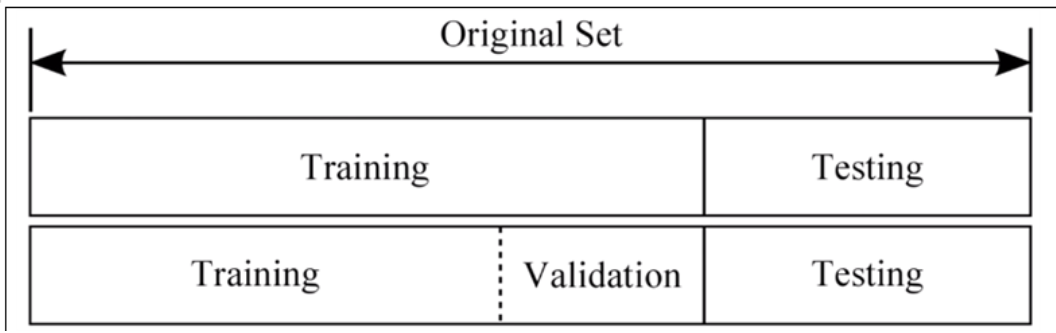

**2. K-fold cross validation**

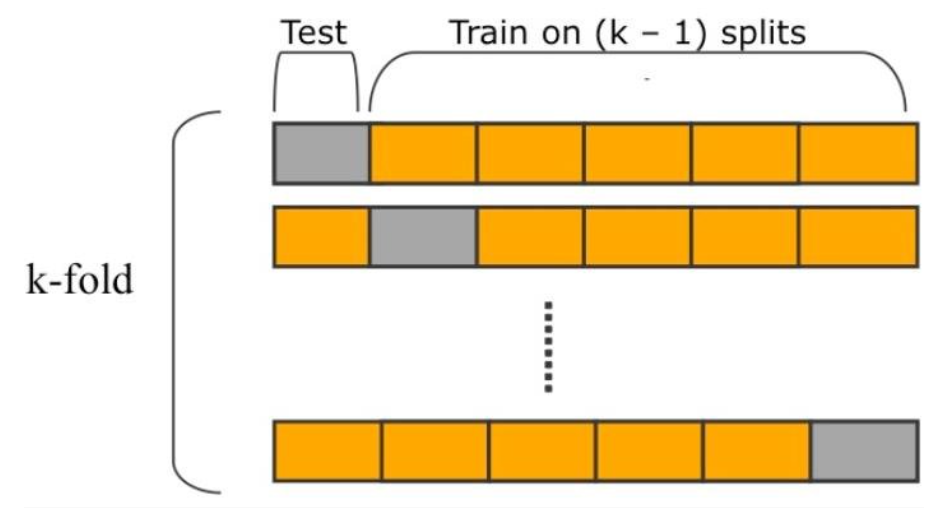

**ex. 5-fold cross validation**

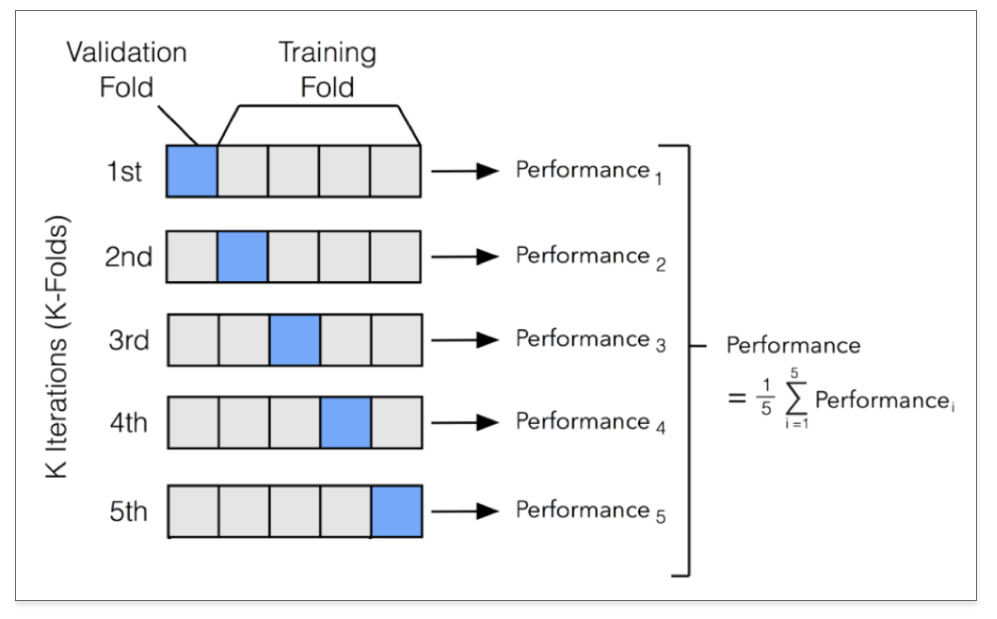

**ex. 5-fold cross validation (validation, test data 모두 사용하는 경우)**

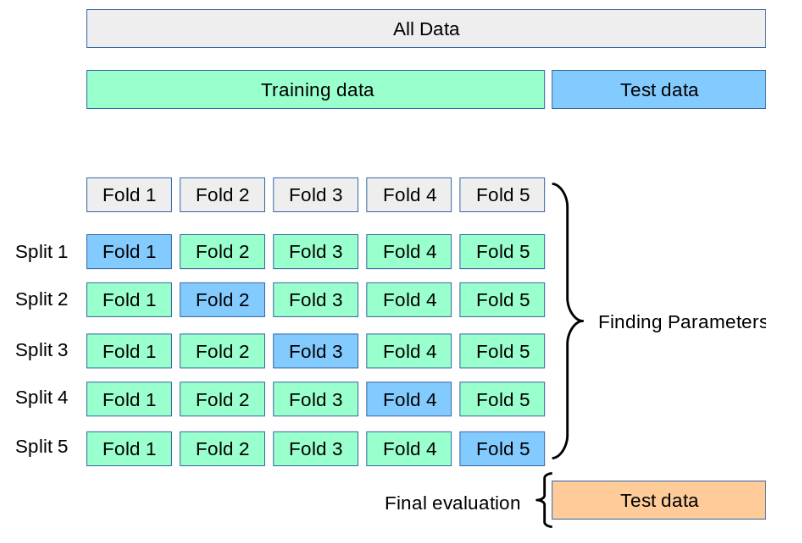

## **4. 예측 모델링**

다양한 예측 모델 건설 (SVM, Decision tree, Random Forest, LGBM, Neural network)에 대해서 실습해 봅시다.

### **4.1 Support Vector Machine (SVM)**

https://scikit-learn.org/stable/modules/svm.html

In [7]:
# 자전거 대여 예측 모델링 (회귀모형)
from sklearn import svm
from sklearn.metrics import r2_score

# SVM 모델 건설
svr_rbf_regr = svm.SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin_regr = svm.SVR(kernel="linear", C=100, gamma="auto")
svr_poly_regr = svm.SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# SVM 모델 학습
svr_rbf_regr.fit(x_train_bike, y_train_bike)
svr_lin_regr.fit(x_train_bike, y_train_bike)
svr_poly_regr.fit(x_train_bike, y_train_bike)

svr_rbf_pred = svr_rbf_regr.predict(x_test_bike)
svr_lin_pred = svr_lin_regr.predict(x_test_bike)
svr_poly_pred = svr_poly_regr.predict(x_test_bike)

#성능 확인
print("SVM RBF model, R2 score",r2_score(y_test_bike,svr_rbf_pred))
print("SVM linear model, R2 score",r2_score(y_test_bike,svr_lin_pred))
print("SVM poly model, R2 score",r2_score(y_test_bike,svr_poly_pred))

SVM RBF model, R2 score 0.5715311589153795
SVM linear model, R2 score 0.792617003980835
SVM poly model, R2 score 0.7706889797597037


In [8]:
# 자궁암 예측 모델링 (분류모형)
from sklearn import svm
from sklearn.metrics import f1_score

# SVM 모델 건설
svc_rbf_clf = svm.SVC(kernel="rbf", C=0.1, gamma="auto")
svc_lin_clf = svm.SVC(kernel="linear", C=0.1, gamma="auto")
svc_poly_clf = svm.SVC(kernel="poly", C=0.1, gamma="auto")

# SVM 모델 학습
svc_rbf_clf.fit(x_train_cancer, y_train_cancer)
svc_lin_clf.fit(x_train_cancer, y_train_cancer)
svc_poly_clf.fit(x_train_cancer, y_train_cancer)

svc_rbf_pred = svc_rbf_clf.predict(x_test_cancer)
svc_lin_pred = svc_lin_clf.predict(x_test_cancer)
svc_poly_pred = svc_poly_clf.predict(x_test_cancer)

#성능 확인
print("SVM RBF model, f1 score",f1_score(y_test_cancer,svc_rbf_pred))
print("SVM linear model, f1 score",f1_score(y_test_cancer,svc_lin_pred))
print("SVM poly model, f1 score",f1_score(y_test_cancer,svc_poly_pred))

SVM RBF model, f1 score 0.0
SVM linear model, f1 score 0.0
SVM poly model, f1 score 0.0


### **4.2 Decision tree**

https://scikit-learn.org/stable/modules/tree.html#decision-trees

In [9]:
# 자전거 대여 예측 모델링 (회귀모형)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Decisoni tree 모델 건설
dt_regr=DecisionTreeRegressor(max_depth=3)

# Decision tree 모델 학습
dt_regr.fit(x_train_bike, y_train_bike)

pred = dt_regr.predict(x_test_bike)

#성능 확인
print("Decision tree model, R2 score",r2_score(y_test_bike,pred))

Decision tree model, R2 score 0.7806055179736361


[Text(0.5, 0.875, 'temp <= 0.432\nsquared_error = 3719619.914\nsamples = 584\nvalue = 4595.313'),
 Text(0.25, 0.625, 'yr <= 0.5\nsquared_error = 2382213.836\nsamples = 220\nvalue = 3079.568'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'season_4 <= 0.5\nsquared_error = 1081357.556\nsamples = 114\nvalue = 2225.404'),
 Text(0.0625, 0.125, 'squared_error = 323762.459\nsamples = 78\nvalue = 1677.949'),
 Text(0.1875, 0.125, 'squared_error = 666492.302\nsamples = 36\nvalue = 3411.556'),
 Text(0.375, 0.375, 'season_1 <= 0.5\nsquared_error = 2152705.763\nsamples = 106\nvalue = 3998.198'),
 Text(0.3125, 0.125, 'squared_error = 1538287.388\nsamples = 49\nvalue = 4989.571'),
 Text(0.4375, 0.125, 'squared_error = 1109707.297\nsamples = 57\nvalue = 3145.965'),
 Text(0.75, 0.625, 'yr <= 0.5\nsquared_error = 2300096.359\nsamples = 364\nvalue = 5511.423'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'weathersit_3 <= 0.5\nsquared_error = 692171.296\nsamples = 172\nvalue = 4300.39'),
 Text

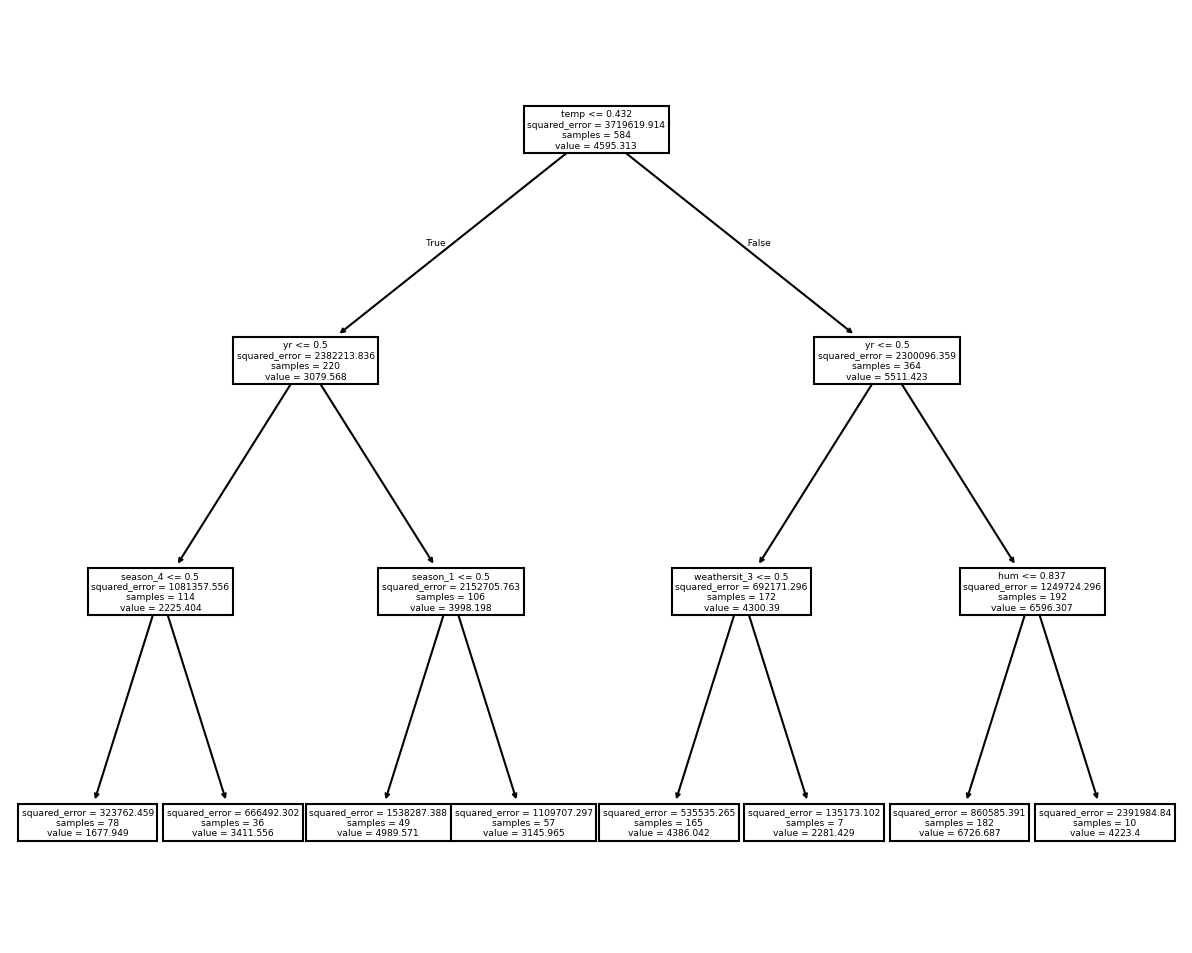

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#자전거 대여 예측 Decision tree 모델 해석을 위한 시각화
plt.figure(figsize=(10,8), dpi=150)
plot_tree(dt_regr, feature_names=x_train_bike.columns)

In [11]:
# 자궁암 예측 모델링 (분류모형)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Decisoni tree 모델 건설
dt_cls=DecisionTreeClassifier(max_depth=3)

# Decisoni tree 모델 학습
dt_cls.fit(x_train_cancer, y_train_cancer)

pred = dt_cls.predict(x_test_cancer)

#성능 확인
print("Decisin tree model, F1 score",f1_score(y_test_cancer,pred))

Decisin tree model, F1 score 0.0


[Text(0.5416666666666666, 0.875, 'Hormonal.Contraceptives..years. <= 12.5\ngini = 0.118\nsamples = 686\nvalue = [643.0, 43.0]'),
 Text(0.3333333333333333, 0.625, 'STDs..Number.of.diagnosis <= 0.5\ngini = 0.105\nsamples = 667\nvalue = [630, 37]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'Smokes..years. <= 33.0\ngini = 0.081\nsamples = 611\nvalue = [585, 26]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.079\nsamples = 610\nvalue = [585.0, 25.0]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.375, 'Number.of.sexual.partners <= 2.5\ngini = 0.316\nsamples = 56\nvalue = [45, 11]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.428\nsamples = 29\nvalue = [20, 9]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.137\nsamples = 27\nvalue = [25, 2]'),
 Text(0.75, 0.625, 'Hormonal.Contraceptives..years. <= 14.5\ngini = 0.432\nsamples = 19\nvalue = [13, 6]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\n

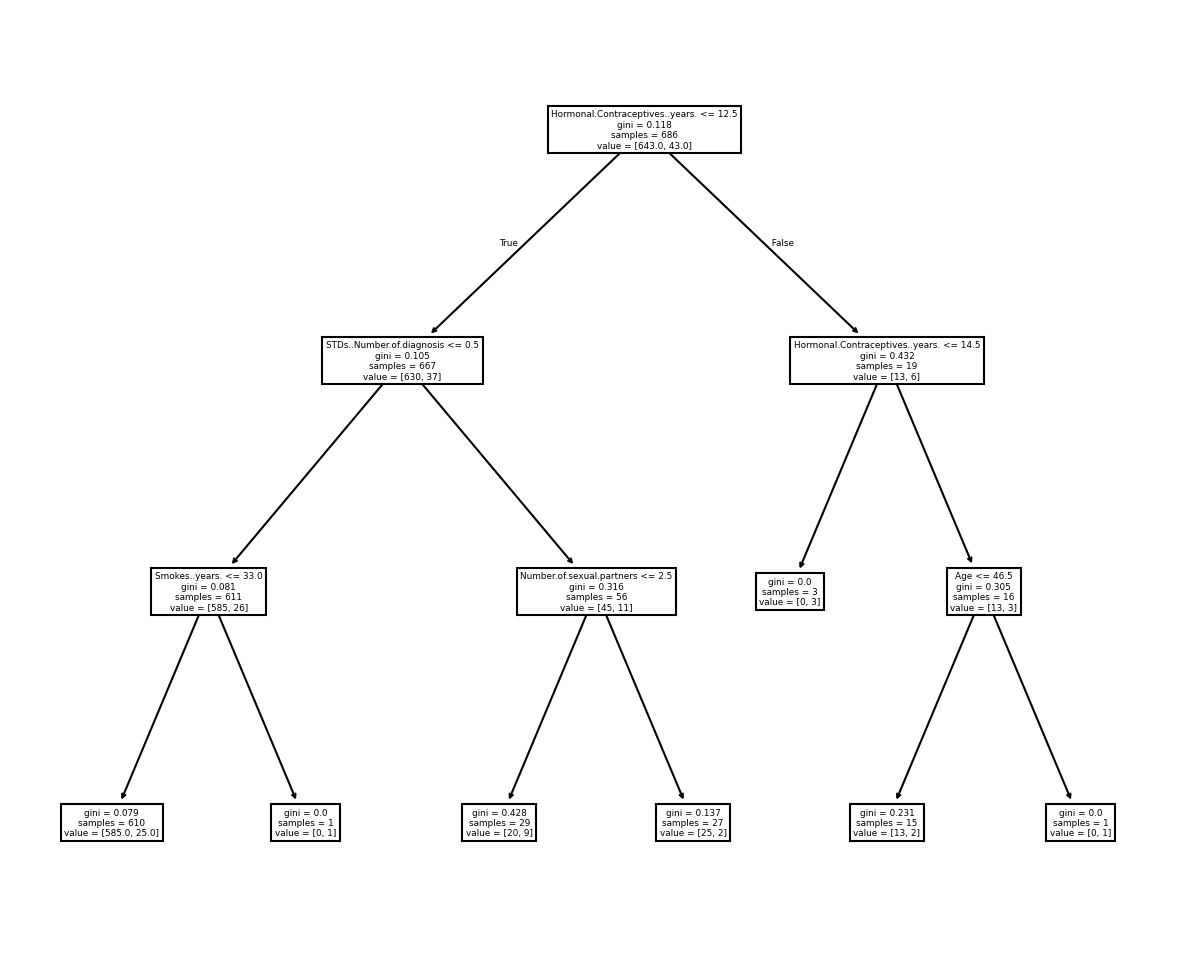

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#자궁암 예측 Decision tree 모델 해석을 위한 시각화
plt.figure(figsize=(10,8), dpi=150)
plot_tree(dt_cls, feature_names=x_train_cancer.columns)

### **4.3 Random forest**

https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles

In [13]:
# 자전거 대여 예측 모델링 (회귀모형)
from sklearn.ensemble import RandomForestRegressor

#Random forest model 건설
rf_regr=RandomForestRegressor(max_depth=3)

#Random forest model 학습
rf_regr.fit(x_train_bike, y_train_bike)

pred = rf_regr.predict(x_test_bike)

#성능 확인
print("Random forest model, R2 score",r2_score(y_test_bike,pred))

Random forest model, R2 score 0.818616135024338


In [14]:
# 자궁암 예측 모델링 (분류모형)
from sklearn.ensemble import RandomForestClassifier

#Random forest model 건설
rf_cls=RandomForestClassifier(max_depth=3)

#Random forest model 학습
rf_cls.fit(x_train_cancer, y_train_cancer)

pred = rf_cls.predict(x_test_cancer)

#성능 확인
print("Random forest model, F1 score",f1_score( y_test_cancer,pred))

Random forest model, F1 score 0.0


In [15]:
x_test_bike

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
404,1,2,0,4,1,0.265000,0.562083,0.194037,True,False,False,False,True,False,False
726,1,12,0,4,1,0.254167,0.652917,0.350133,True,False,False,False,False,True,False
159,0,6,0,4,1,0.808333,0.568333,0.149883,False,True,False,False,False,True,False
422,1,2,0,1,1,0.366667,0.490833,0.268033,True,False,False,False,True,False,False
512,1,5,0,0,0,0.690000,0.697083,0.215171,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,1,11,0,2,1,0.280833,0.567083,0.173513,False,False,False,True,True,False,False
713,1,12,0,5,1,0.281667,0.642917,0.131229,False,False,False,True,True,False,False
40,0,2,0,4,1,0.144348,0.437391,0.221935,True,False,False,False,True,False,False
432,1,3,0,4,1,0.527500,0.567500,0.441563,True,False,False,False,True,False,False


### **4.4 LGBM**

https://lightgbm.readthedocs.io/en/stable/index.html

In [16]:
# 자전거 대여 예측 모델링 (회귀모형)
import lightgbm as lgb

#LGBM model 건설
lgb_regr = lgb.LGBMRegressor(num_leaves=31, objective='regression')

#LGBM model 학습
lgb_regr.fit(x_train_bike, y_train_bike)

pred = lgb_regr.predict(x_test_bike)

#성능 확인
print("LGBM model, R2 score",r2_score(y_test_bike,pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 584, number of used features: 13
[LightGBM] [Info] Start training from score 4595.313356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [17]:
# 자궁암 예측 모델링 (분류모형)
import lightgbm as lgb

#LGBM model 건설
lgb_cls = lgb.LGBMClassifier(num_leaves=31, objective='binary')

#LGBM model 학습
lgb_cls.fit(x_train_cancer, y_train_cancer)

pred = lgb_cls.predict(x_test_cancer)

#성능 확인
print("LGBM model, F1 score",f1_score(y_test_cancer,pred))

[LightGBM] [Info] Number of positive: 43, number of negative: 643
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 686, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.062682 -> initscore=-2.704945
[LightGBM] [Info] Start training from score -2.704945
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

### **4.5 Neural Network**

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

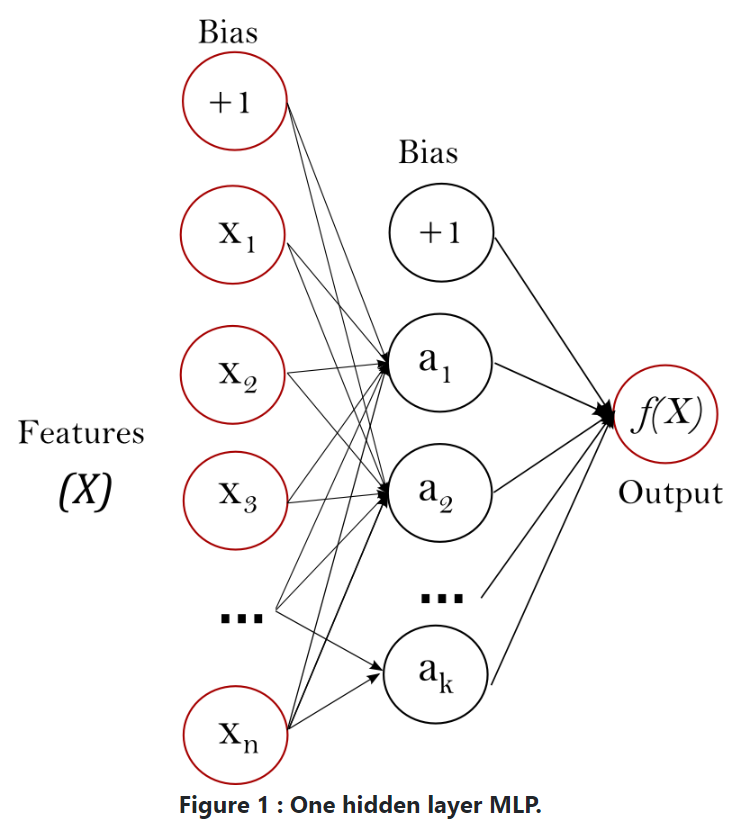

In [18]:
# 자전거 대여 예측 모델링 (회귀모형) using scikit learn
from sklearn.neural_network import MLPRegressor

#Neural network model 건설
nn_regr= MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), max_iter=1000, random_state=1)

#Neural network model 학습
nn_regr.fit(x_train_bike, y_train_bike)

pred = nn_regr.predict(x_test_bike)

#성능 확인
print("Neural network model, R2 score",r2_score(y_test_bike,pred))

Neural network model, R2 score 0.8195573520888939


c:\Users\jemin\anaconda\envs\aigenius\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [19]:
# 자궁암 예측 모델링 (분류모형) using scikit learn
from sklearn.neural_network import MLPClassifier

#Neural network model 건설
nn_cls=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), max_iter=1000, random_state=1)

#Neural network model학습
nn_cls.fit(x_train_cancer, y_train_cancer)

pred = nn_cls.predict(x_test_cancer)

#성능 확인
print("Neural network model, F1 score",f1_score(y_test_cancer,pred))

Neural network model, F1 score 0.17391304347826086


c:\Users\jemin\anaconda\envs\aigenius\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### **회귀와 분류 모델의 성능 지표에 대해 좀 더 알아보기**

**1. 회귀 모델**

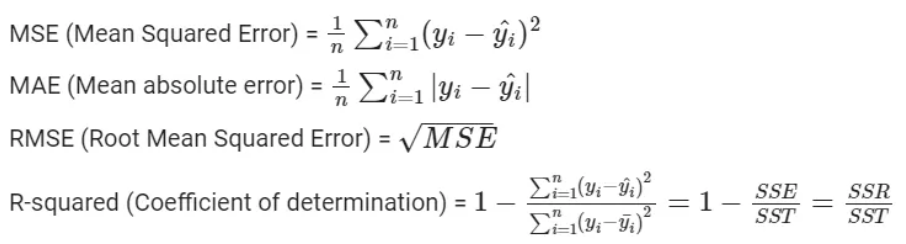

**2. 분류 모델**

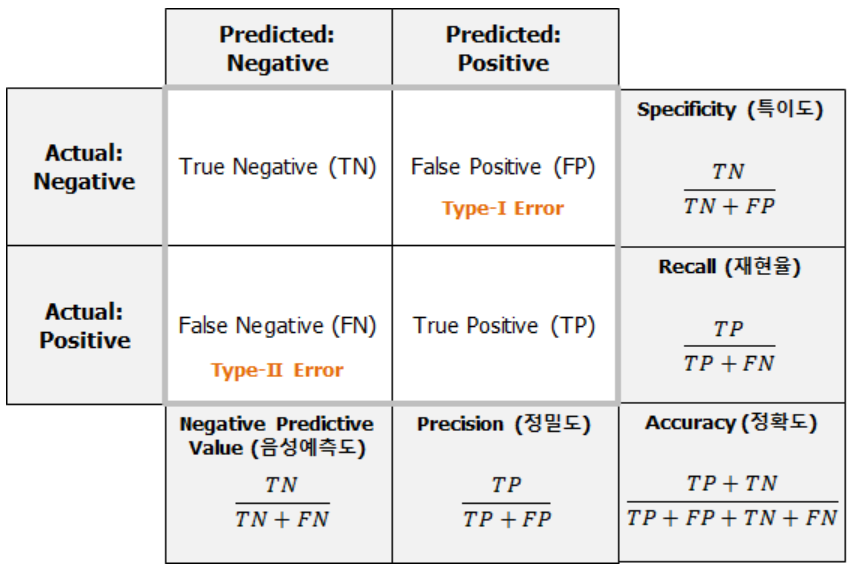

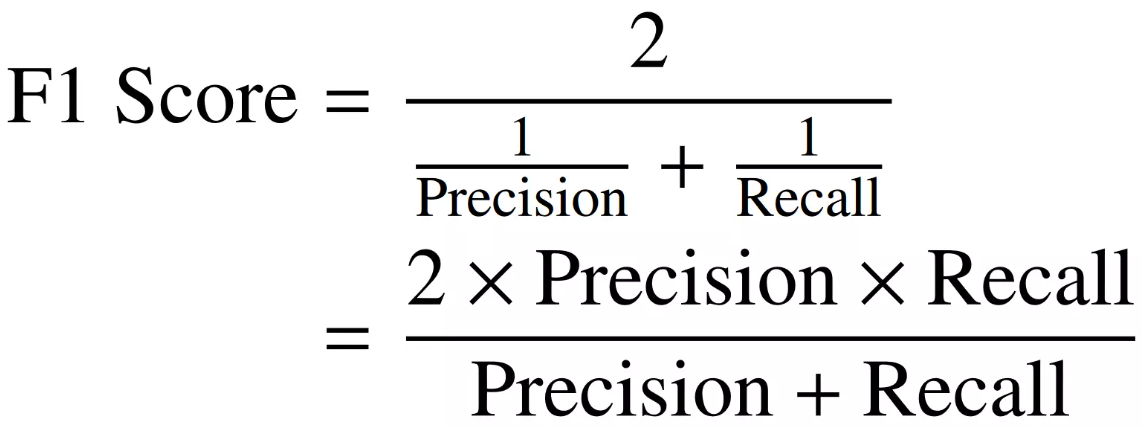

## **5. SHAP 기반 예측 모델 해석**

블랙박스 모델인 tree 기반 모델 (ex. random forest, LGBM, XGboost), neural network 모델을 해석하기 위한 SHAP 방법론에 대해서 실습해 봅시다.

다양한 블랙박스 예측 모형을 해석하기 위하여 3가지 SHAP 설명 방법이 있습니다.

**1) Kernel SHAP**

모든 모형 가능. 하지만 설명 결과물 도출이 매우 느림.

**2) Tree SHAP**

Tree 기반 모델만 설명 가능.

**3) Deep SHAP**

Neural network 기반 모델만 설명 가능.

In [20]:
# SHAP 설치
!pip install shap

### **5.1 자전거 예측 모델 해석**

LGBM이 0.898 로 성능이 가장 좋으니 LGBM model을 해석하기 위해 SHAP 방법을 사용해 봅시다.



In [21]:
import shap

shap.initjs()

#Tree 기반 모델 LGBM를 설명하기 위한 Tree SHAP 사용
explainer_lgb = shap.TreeExplainer(lgb_regr)
shap_values_lgb = explainer_lgb.shap_values(x_train_bike)

In [22]:
import plotly.offline as py
py.init_notebook_mode(connected=True)

from bokeh.io import output_notebook
output_notebook()



Loading BokehJS ...

In [23]:
# SHAP force plot

shap.initjs()
shap.force_plot(explainer_lgb.expected_value, shap_values_lgb[0], x_test_bike.iloc[0,:], feature_names = x_train_bike.columns)

### **SHAP force plot 결과 해석**

* 첫 번째 데이터에서 자전거 대여 수 3505 대 예측. 예측 평균인 base value 4595에 비해 낮은 값. yr=1, mnth=2, season_1 (겨울), windspped=0.194가 자전거 대여수를 낮추는 데 기여함. 기여하는 정도는 파란색 막대의 길이로 내림 차순으로 정리 된 것을 알 수 있음.

* temp=0.265, hum=0.5621은 자전거 대여를 높이는 데 영향을 미침. temp가 hum보다 자전거 대여에 더 높은 영향을 미치는 것을 알 수 있음.

### **구체적으로 하나의 데이터에서 얼마나 영향 미치는지 알고 싶다면?**

아래와 같이 실제로 출력해서 SHAP values를 확인하면 된다.

In [24]:
print(x_test_bike.iloc[0,:])
print(shap_values_lgb[0])

yr                     1
mnth                   2
holiday                0
weekday                4
workingday             1
temp               0.265
hum             0.562083
windspeed       0.194037
season_1            True
season_2           False
season_3           False
season_4           False
weathersit_1        True
weathersit_2       False
weathersit_3       False
Name: 404, dtype: object
[-1199.65589198  -394.39104195     0.            32.97095292
   -30.55785026   796.14285726   119.43702035  -121.03863716
  -199.18279065   -13.84711511   -12.42412129   -55.20277245
    19.65564037   -32.11029461     0.        ]


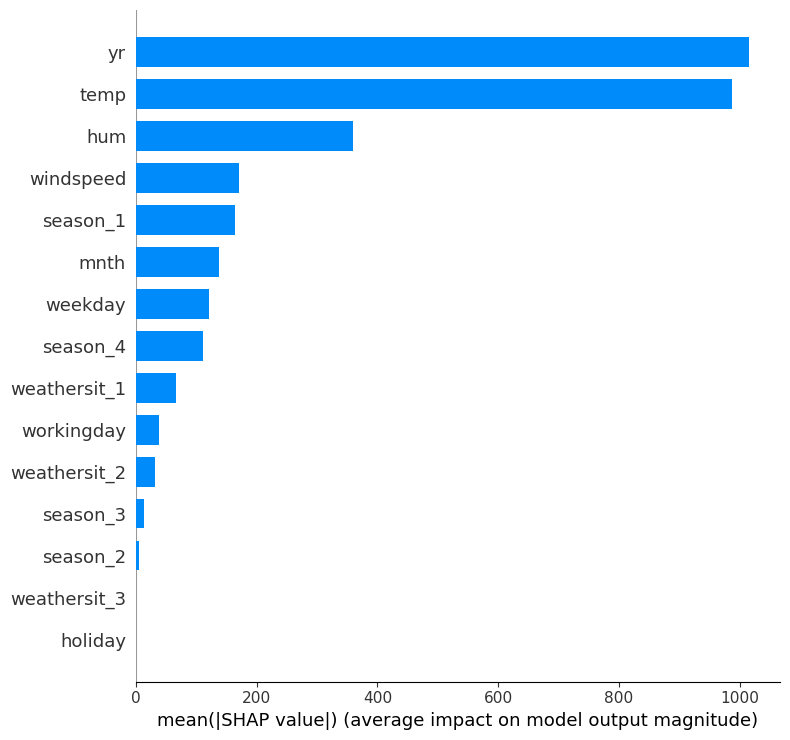

In [25]:
#SHAP 특징 중요도
shap.summary_plot(shap_values_lgb, x_train_bike, feature_names=x_train_bike.columns, plot_type="bar")

### **SHAP 중요도 결과 해석**

* yr이 자전거 대여 수 예측에 가장 큰 영향을 미치고 temp, hum, windspeed, season_1 순서대로 영향을 미침.

* 의외로 holiday 유무는 자전거 대여 예측에 큰 영향을 미치지 않음.

### **5.2 자궁암 예측 모델 해석**

Neural network 모델이 0.148로 더 높지만 keras, pytorch로 만든 경우 SHAP 방법은 해석을 제공. 그러므로, LGBM 모델을 SHAP 방법을 이용해 해석해 봅시다.



In [26]:
import shap

shap.initjs()

#Tree 기반 모델 LGBM를 설명하기 위한 Tree SHAP 사용
explainer_lgb = shap.TreeExplainer(lgb_cls)
shap_values_lgb = explainer_lgb.shap_values(x_train_cancer)

c:\Users\jemin\anaconda\envs\aigenius\Lib\site-packages\shap\explainers\_tree.py:544: UserWarning:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray



In [27]:
# SHAP force plot

shap.initjs()
shap.force_plot(explainer_lgb.expected_value, shap_values_lgb[0], x_test_cancer.iloc[0,:], feature_names = x_train_cancer.columns)

### **SHAP force plot 결과 해석**

* 첫 번째 데이터에서 자궁암 확률을 평균 예측 -6.108보다 좀 더 낮은 -7.49로 예측. Hormonal.Contraceptives, years, Num.of.pregnancies가 자궁암을 낮추는데 파란 막대의 길이 만큼 기여함.

* age=25, Number.of.sexual.partners=2, First.sexual.intercourse=18이 자궁암 확률을 높이는데 기여함.

In [28]:
# 구체적으로 하나의 데이터에서 예측 결과 해석
print( x_test_cancer.iloc[0,:])
print(shap_values_lgb[0])

Age                                 25.00
Number.of.sexual.partners            2.00
First.sexual.intercourse            18.00
Num.of.pregnancies                   2.00
Smokes                               0.00
Smokes..years.                       0.00
Hormonal.Contraceptives              1.00
Hormonal.Contraceptives..years.      0.25
IUD                                  0.00
IUD..years.                          0.00
STDs                                 0.00
STDs..number.                        0.00
STDs..Number.of.diagnosis            0.00
STDs..Time.since.first.diagnosis     1.00
STDs..Time.since.last.diagnosis      1.00
Name: 255, dtype: float64
[ 1.32192452  0.38630936  0.12711749 -0.76745688  0.03016533 -0.17723852
 -1.02058173 -1.0172817   0.01380542 -0.05608662  0.01669661 -0.01616216
 -0.23031481  0.01159256 -0.00875004]


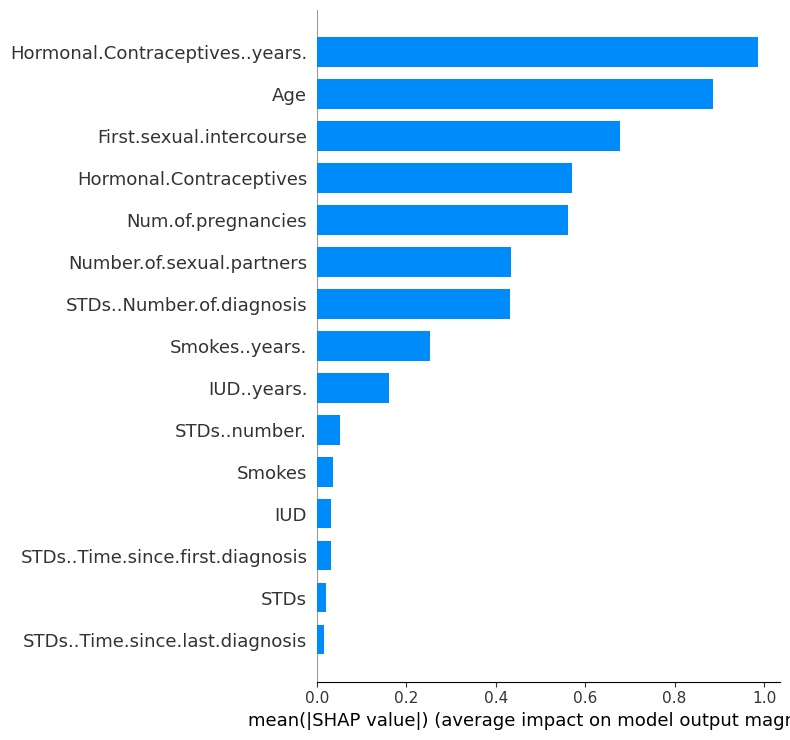

In [29]:
#SHAP 특징 중요도
shap.summary_plot(shap_values_lgb, x_train_cancer, feature_names=x_train_cancer.columns, plot_type="bar")

### **SHAP 중요도 결과 해석**

* Hormonal.Contraceptives..years, Age, First.sexutal.intercourse, Hormonal.Contraceptives 등 내림 차순으로 자궁암 예측에 중요도가 큰 독립변수가 위에 위치.

* Regression 해석과 다르게 classification은 분류하고자 하는 label 마다의 영향력을 한눈에 알 수 있음.

# **[수업 내용 확인하기]**

### 1) 자전거 데이터에서 "casual" (즉흥적인 회원 대여수), "registered" (일상 회원 대여수)를 y로 예측하는 Linear regression, LGBM 모델을 각각 만들고 예측 성능을 비교하세요.

### 2) 1에서 만들어진 "casual", "registered" 각각을 예측 하는 Linear regression, LGBM 모델 결과를 해석하여 (LR은 coefficient 해석, LGBM은 SHAP 방법으로 해석) 예측에 가장 큰 영향을 미치는 독립변수는 무엇인지 비교하세요.

### 3) Cancer 데이터에서 10-30대, 40-60대 에 따라 자궁암 여부를 예측하는 Logistic regression, LGBM 모델을 만들고 예측 성능을 비교하세요.

### 4) 3에서 만들어진 Logistic regression, LGBM 모델 결과를 해석하여 (LR은 coefficient 해석, LGBM은 SHAP 방법으로 해석) 예측에 가장 큰 영향을 미치는 독립변수는 무엇인지 비교하세요.